## Comparison of Loss Functions in Multiclass Classification

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Data-Driven Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates the influence of the loss function on a multiclass classfier. A deep neural network (DNN) is trained with different loss functions. For ease of illustration, training examples from a synthetically created dataset are used. The accuracy of the trained classifiers, as well as their decision boundaries are compared for the different loss functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

### Generate Dataset

In the following, a synthetic dataset with $N$ examples from $C$ classes is generated by using the function [`sklearn.datasets.make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification). The categorical class labels are one-hot encoded, and the dataset is split into a training and validation subset.

In [2]:
N = 2000  # total number of examples
C = 3  # number of classes

X, Y = make_classification(n_samples=N,
                           n_classes=C,
                           n_clusters_per_class=1,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           random_state=42)

# one-hot encoding of class labels
Y1h = to_categorical(Y, C)

# split into training/validation subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1h, test_size=0.2)

### Define and Train the Models

The model is defined as a concatenation of an input layer, two hidden layers and an output layer. The architecture of the model, e.g. the output shapes of the individual layers, as well as the number of parameters that have to be determined in the training phase are summarized below.

In [3]:
def dnn_model(input_shape=(2,), classes=C):

    inputs = Input(shape=input_shape)
    x = Dense(16, activation='relu')(inputs)
    x = Dense(16, activation='relu')(x)
    x = Dense(classes, activation='softmax')(x)

    return Model(inputs, x)


model = dnn_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


2022-02-08 17:18:39.477412: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now three models with the same architecture but different loss functions are trained. As loss functions, the mean-squared error (MSE), the mean-absolute error (MAE) and categorical crossentropy are used.

In [4]:
def train_model(loss):
    
    model = dnn_model()
    model.compile(loss=loss, optimizer="adam", metrics=["accuracy"])
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=32)
    
    return model, history


model_mse, history_mse = train_model('mse')
model_mae, history_mae = train_model('mae')
model_crossentropy, history_crossentropy = train_model('categorical_crossentropy')

Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1910 - accuracy: 0.6587 - val_loss: 0.1672 - val_accuracy: 0.7975
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.8831 - val_loss: 0.1167 - val_accuracy: 0.9000
Epoch 3/100
50/50 [==============================] - 0s 993us/step - loss: 0.0945 - accuracy: 0.8988 - val_loss: 0.0819 - val_accuracy: 0.9025
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0694 - accuracy: 0.9038 - val_loss: 0.0618 - val_accuracy: 0.9075
Epoch 5/100
50/50 [==============================] - 0s 987us/step - loss: 0.0571 - accuracy: 0.9094 - val_loss: 0.0525 - val_accuracy: 0.9175
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9162 - val_loss: 0.0472 - val_accuracy: 0.9225
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9187 - val_loss: 0.0439 - val_accuracy: 0.9325
Epoch 8/1

50/50 [==============================] - 0s 969us/step - loss: 0.0310 - accuracy: 0.9400 - val_loss: 0.0257 - val_accuracy: 0.9675
Epoch 59/100
50/50 [==============================] - 0s 969us/step - loss: 0.0308 - accuracy: 0.9419 - val_loss: 0.0255 - val_accuracy: 0.9675
Epoch 60/100
50/50 [==============================] - 0s 973us/step - loss: 0.0311 - accuracy: 0.9406 - val_loss: 0.0256 - val_accuracy: 0.9650
Epoch 61/100
50/50 [==============================] - 0s 973us/step - loss: 0.0308 - accuracy: 0.9419 - val_loss: 0.0258 - val_accuracy: 0.9675
Epoch 62/100
50/50 [==============================] - 0s 979us/step - loss: 0.0309 - accuracy: 0.9406 - val_loss: 0.0260 - val_accuracy: 0.9675
Epoch 63/100
50/50 [==============================] - 0s 971us/step - loss: 0.0309 - accuracy: 0.9406 - val_loss: 0.0255 - val_accuracy: 0.9675
Epoch 64/100
50/50 [==============================] - 0s 986us/step - loss: 0.0307 - accuracy: 0.9413 - val_loss: 0.0261 - val_accuracy: 0.9625
Epoch

50/50 [==============================] - 0s 970us/step - loss: 0.0589 - accuracy: 0.9256 - val_loss: 0.0488 - val_accuracy: 0.9475
Epoch 16/100
50/50 [==============================] - 0s 978us/step - loss: 0.0573 - accuracy: 0.9269 - val_loss: 0.0469 - val_accuracy: 0.9550
Epoch 17/100
50/50 [==============================] - 0s 964us/step - loss: 0.0559 - accuracy: 0.9306 - val_loss: 0.0448 - val_accuracy: 0.9550
Epoch 18/100
50/50 [==============================] - 0s 968us/step - loss: 0.0546 - accuracy: 0.9300 - val_loss: 0.0436 - val_accuracy: 0.9575
Epoch 19/100
50/50 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9306 - val_loss: 0.0429 - val_accuracy: 0.9575
Epoch 20/100
50/50 [==============================] - 0s 988us/step - loss: 0.0530 - accuracy: 0.9319 - val_loss: 0.0425 - val_accuracy: 0.9550
Epoch 21/100
50/50 [==============================] - 0s 984us/step - loss: 0.0524 - accuracy: 0.9337 - val_loss: 0.0415 - val_accuracy: 0.9575
Epoch 2

50/50 [==============================] - 0s 957us/step - loss: 0.0438 - accuracy: 0.9362 - val_loss: 0.0351 - val_accuracy: 0.9550
Epoch 73/100
50/50 [==============================] - 0s 965us/step - loss: 0.0440 - accuracy: 0.9369 - val_loss: 0.0357 - val_accuracy: 0.9475
Epoch 74/100
50/50 [==============================] - 0s 952us/step - loss: 0.0441 - accuracy: 0.9369 - val_loss: 0.0337 - val_accuracy: 0.9550
Epoch 75/100
50/50 [==============================] - 0s 969us/step - loss: 0.0439 - accuracy: 0.9369 - val_loss: 0.0352 - val_accuracy: 0.9500
Epoch 76/100
50/50 [==============================] - 0s 958us/step - loss: 0.0441 - accuracy: 0.9381 - val_loss: 0.0340 - val_accuracy: 0.9550
Epoch 77/100
50/50 [==============================] - 0s 964us/step - loss: 0.0436 - accuracy: 0.9369 - val_loss: 0.0345 - val_accuracy: 0.9550
Epoch 78/100
50/50 [==============================] - 0s 965us/step - loss: 0.0434 - accuracy: 0.9375 - val_loss: 0.0355 - val_accuracy: 0.9450
Epoch

50/50 [==============================] - 0s 981us/step - loss: 0.2051 - accuracy: 0.9381 - val_loss: 0.2209 - val_accuracy: 0.9550
Epoch 30/100
50/50 [==============================] - 0s 986us/step - loss: 0.2042 - accuracy: 0.9356 - val_loss: 0.2184 - val_accuracy: 0.9525
Epoch 31/100
50/50 [==============================] - 0s 964us/step - loss: 0.2030 - accuracy: 0.9375 - val_loss: 0.2201 - val_accuracy: 0.9500
Epoch 32/100
50/50 [==============================] - 0s 977us/step - loss: 0.2006 - accuracy: 0.9381 - val_loss: 0.2163 - val_accuracy: 0.9550
Epoch 33/100
50/50 [==============================] - 0s 989us/step - loss: 0.2017 - accuracy: 0.9362 - val_loss: 0.2144 - val_accuracy: 0.9575
Epoch 34/100
50/50 [==============================] - 0s 981us/step - loss: 0.1992 - accuracy: 0.9388 - val_loss: 0.2160 - val_accuracy: 0.9550
Epoch 35/100
50/50 [==============================] - 0s 1ms/step - loss: 0.1983 - accuracy: 0.9369 - val_loss: 0.2167 - val_accuracy: 0.9625
Epoch 3

50/50 [==============================] - 0s 944us/step - loss: 0.1753 - accuracy: 0.9425 - val_loss: 0.2071 - val_accuracy: 0.9650
Epoch 87/100
50/50 [==============================] - 0s 959us/step - loss: 0.1734 - accuracy: 0.9431 - val_loss: 0.2091 - val_accuracy: 0.9550
Epoch 88/100
50/50 [==============================] - 0s 938us/step - loss: 0.1741 - accuracy: 0.9431 - val_loss: 0.2092 - val_accuracy: 0.9625
Epoch 89/100
50/50 [==============================] - 0s 958us/step - loss: 0.1736 - accuracy: 0.9413 - val_loss: 0.2079 - val_accuracy: 0.9650
Epoch 90/100
50/50 [==============================] - 0s 940us/step - loss: 0.1745 - accuracy: 0.9419 - val_loss: 0.2081 - val_accuracy: 0.9650
Epoch 91/100
50/50 [==============================] - 0s 941us/step - loss: 0.1742 - accuracy: 0.9419 - val_loss: 0.2073 - val_accuracy: 0.9625
Epoch 92/100
50/50 [==============================] - 0s 948us/step - loss: 0.1740 - accuracy: 0.9431 - val_loss: 0.2095 - val_accuracy: 0.9575
Epoch

### Comparison of Models

In order to compare the trained models a first look is taken at the accuracy over epochs for the validation subset. All models have converged to a constant accuracy. However, slight differences can be observed between the different cost functions in terms of final convergence.

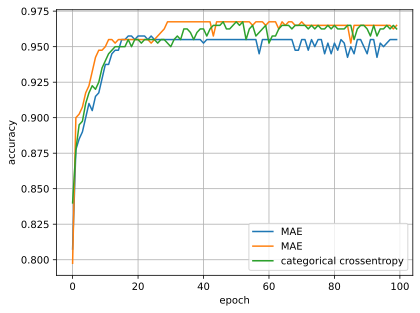

In [5]:
plt.figure()
plt.plot(history_mae.history['val_accuracy'], label='MAE')
plt.plot(history_mse.history['val_accuracy'], label='MAE')
plt.plot(history_crossentropy.history['val_accuracy'], label='categorical crossentropy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()

The decision boundaries of the trained models are visualized in order to further investigate the differences between them.

Text(0.5, 1.0, 'categorical crossentropy')

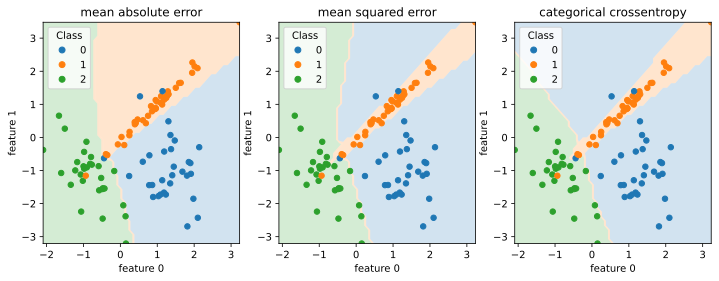

In [6]:
cmap = ListedColormap(plt.rcParams['axes.prop_cycle'].by_key()['color'][:C])

def plot_decision_boundaries(X, Y, model):

    x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
    y = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]))
    xx, yy = np.meshgrid(x, y)
    Xgrid = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(Xgrid)
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=cmap, alpha=.2, levels=3)
    scatter = plt.scatter(X[0:100, 0], X[0:100, 1],
                          c=Y[0:100], s=30, cmap=cmap)
    plt.legend(*scatter.legend_elements(), title="Class")

    plt.xlabel('feature 0')
    plt.ylabel('feature 1')

    
plt.figure(figsize=(12,4))
plt.subplot(131)
plot_decision_boundaries(X_test, np.argmax(Y_test, axis=1), model_mae)
plt.title('mean absolute error')

plt.subplot(132)
plot_decision_boundaries(X_test, np.argmax(Y_test, axis=1), model_mse)
plt.title('mean squared error')

plt.subplot(133)
plot_decision_boundaries(X_test, np.argmax(Y_test, axis=1), model_crossentropy)
plt.title('categorical crossentropy')

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.